# L4: Word embeddings

In this lab you will explore word embeddings. A **word embedding** is a mapping of words to points in a vector space such that nearby words (points) are similar in terms of their distributional properties. You will use word embedding to find similar words, and evaluate their usefulness in an inference task.

You will use the word vectors that come with [spaCy](http://spacy.io). Note that you will need the &lsquo;large&rsquo; English language model; the &lsquo;small&rsquo; model that you used in previous labs does not include proper word vectors.

**Reminder about our [Rules for hand-in assignments](https://www.ida.liu.se/~TDDE16/exam.en.shtml#handins) and the [Policy on cheating and plagiarism](https://www.ida.liu.se/~TDDE16/exam.en.shtml#cheating)**

In [24]:
import spacy

nlp = spacy.load('en_core_web_lg')

Every word in the model&rsquo;s vocabulary comes with a 300-dimensional vector, represented as a NumPy array. The following code cell shows how to access the vector for the word *cheese*:

In [25]:
nlp.vocab['cheese'].vector

array([ 1.3884e+00, -1.3481e+00, -1.7638e+00, -3.2299e-01,  2.8968e+00,
       -3.4742e+00,  1.5614e+00,  4.1019e+00, -2.3339e+00,  7.7066e-01,
        5.4667e+00, -4.3539e+00,  2.1411e+00,  1.0337e+00,  2.1333e+00,
       -5.2507e+00, -8.4292e-01,  1.6601e+00,  8.0711e-01, -1.3815e+00,
       -3.0533e+00,  1.3261e+00, -1.5997e+00,  9.7612e-01, -4.8395e+00,
       -1.1163e+00, -5.6145e+00,  2.0262e+00, -1.7511e+00, -3.1134e+00,
        1.3560e+00, -6.7027e-01, -9.2217e-02, -1.5939e+00, -1.1572e+00,
       -3.2397e+00,  2.8394e+00,  1.9167e+00, -1.8530e+00,  9.4867e-01,
        7.9217e-01,  2.8105e-01,  2.3105e+00, -2.0119e+00,  3.6931e+00,
       -2.1588e+00,  9.3177e-01,  2.4037e-01, -1.9010e+00,  5.0660e-01,
        1.3864e-01,  3.2558e-01, -7.1408e-01, -1.5416e+00, -1.7270e-01,
       -3.7842e+00, -8.8674e-01,  3.5418e+00,  5.5733e+00,  2.0573e+00,
        3.4798e+00, -1.4878e+00,  3.5792e+00,  1.6799e+00,  1.9810e+00,
        4.5659e-01, -4.8671e+00, -1.0939e+00,  1.8729e+00,  3.80

## Problem 1: Finding similar words

Your first task is to use the word embeddings to find similar words. More specifically, we ask you to write a function `most_similar` that takes a vector $x$ and returns a list with the 10 most similar entries in spaCy&rsquo;s vocabulary, with similarity being defined by cosine.

**Tip:** spaCy already has a [`most_similar`](https://spacy.io/api/vectors#most_similar) method that you can wrap.

In [26]:
# TODO: Enter your implementation of `most_similar` here
import numpy as np

def most_similar(x):
    queries = np.asarray([x])
    keys = nlp.vocab.vectors.most_similar(queries, n=10)[0][0]
    keys_list = [nlp.vocab[k] for k in keys]
    
    return keys_list

Test your implementation by running the following code cell, which will print the 10 most similar words for the word *cheese*:

In [27]:
print(' '.join(w.text for w in most_similar(nlp.vocab['cheese'].vector)))

cheese cheesed cheesey cheeses headcheese cheesesteak -St cheesesteaks -Cheese theese


You should get the following output:

Once you have a working implementation of `most_similar`, use it to think about in what sense the returned words really are &lsquo;similar&rsquo; to the cue word. Try to find examples where the cue word and at least one of the words returned by `most_similar` are in the following semantic relations:

1. synonymy (exchangeable meanings)
2. antonymy (opposite meanings)
3. hyperonymy/hyponymy (more specific/less specific meanings)

Document your examples in the code cell below.

In [28]:
# TODO: Insert code here to generate your examples
# 1
print(' '.join(w.text for w in most_similar(nlp.vocab['beautiful'].vector)))

beautiful beautiful- beautiful-- beautifuly beautifu beautifull beautif beauti gorgeous lovely


In [29]:
# 2
print(' '.join(w.text for w in most_similar(nlp.vocab['cold'].vector)))

cold cold- appuyé Scold chilly refreezing frosty freezing colder warm


In [30]:
# 3
print(' '.join(w.text for w in most_similar(nlp.vocab['dog'].vector)))

dog dogs cat puppy pet pup canine wolfdogs dogsled uppy


## Problem 2: Plotting similar words

Your next task is to visualize the word embedding space by a plot. To do so, you will have to reduce the dimensionality of the space from 300 to 2&nbsp;dimensions. One suitable algorithm for this is [T-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (TSNE), which is implemented in scikit-learn&rsquo;s [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

Write a function `plot_most_similar` that takes a list of words (lexemes) and does the following:

1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
2. Compute the TSNE transformation of the corresponding vectors to 2&nbsp;dimensions.
3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.

In [31]:
# TODO: Write code here to plot the most similar words
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_most_similar(x):
    vector = np.array([i.vector for i in x])
    words = [i.text for i in x]    
    similar_list = np.array([most_similar(i)[0].vector for i in vector])  
    similar_words = [most_similar(i)[0].text for i in vector]
    vector_tr = TSNE(n_components=2, learning_rate='auto', init='pca',perplexity=vector.shape[0]-1).fit_transform(vector)
    similar_list_tr = TSNE(n_components=2,learning_rate='auto', init='pca',perplexity=similar_list.shape[0]-1).fit_transform(similar_list)
    
    plt.plot(vector_tr[:,0],vector_tr[:,1],'bo',label='words')
    plt.plot(similar_list_tr[:,0],similar_list_tr[:,1],'ro',label='similar words')
    
    for i, txt in enumerate(words):
        plt.annotate(txt, (vector_tr[:,0][i], vector_tr[:,1][i]))    
        
    plt.legend(loc="upper left")
    plt.show()
    
    return words

In [32]:
a=(nlp.vocab[w] for w in ['cheese', 'goat', 'sweden', 'university', 'computer'])
np.array([i.text for i in a])

array(['cheese', 'goat', 'sweden', 'university', 'computer'], dtype='<U10')

Test your code by running the following cell:

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


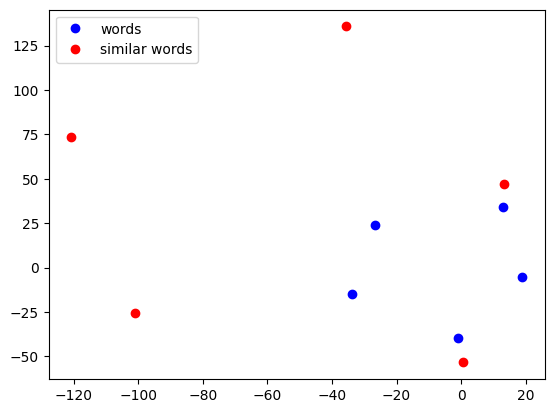

[]

In [33]:
plot_most_similar(nlp.vocab[w] for w in ['cheese', 'goat', 'sweden', 'university', 'computer'])

Take a few minutes to look at your plot. What does it tell you? What does it *not* tell you?

## Problem 3: Analogies

In a **word analogy task** you are given three words $x$, $y$, $z$ and have to predict a word $w$ that has the same semantic relation to $z$ as $y$ has to $x$. One example is *man*, *woman*, *brother*, the expected answer being *sister* (the semantic relation is *male*/*female*).

[Mikolov et al. (2013)](http://www.aclweb.org/anthology/N13-1090) have shown that some types of word analogy tasks can be solved by adding and substracting word vectors in a word embedding: the vector for *sister* is the closest vector (in terms of cosine distance) to the vector *brother* $-$ *man* $+$ *woman*. Your next task is to write a function `fourth` that takes in three words (say *brother*, *man*, *woman*) and predicts the word that completes the analogy (in this case, *sister*).

In [34]:
# TODO: Enter code here to solve the analogy problem
def fourth(x,y,z):
    vector = x.vector-y.vector+z.vector
    
    return most_similar(vector)[0]

Test your code by running the following code. You should get *sister*.

In [35]:
fourth(nlp.vocab['brother'], nlp.vocab['man'], nlp.vocab['woman']).text

'sister'

You should also be able to get the following:

* *Stockholm* $-$ *Sweden* $+$ *Germany* $=$ *Berlin*
* *Swedish* $-$ *Sweden* $+$ *France* $=$ *French*
* *better* $-$ *good* $+$ *bad* $=$ *worse*
* *walked* $-$ *walk* $+$ *take* $=$ *took*

Experiment with other examples to see whether you get the expected output. Provide three examples of analogies for which the model produces the &lsquo;correct&rsquo; answer, and three examples on which the model &lsquo;failed&rsquo;. Based on your theoretical understanding of word embeddings, do you have a hypothesis as to why the model succeeds/fails in completing the analogy? Discuss this question in a short text.

*TODO: Insert your examples and your discussion here*

In [36]:
fourth(nlp.vocab['Stockholm'], nlp.vocab['Sweden'], nlp.vocab['Germany']).text

'Germany'

## Natural language inference dataset

In the second part of this lab, you will be evaluating the usefulness of word embeddings in the context of a natural language inference task. The data for this part is the [SNLI corpus](https://nlp.stanford.edu/projects/snli/), a collection of 570k human-written English image caption pairs manually labeled with the labels *Entailment*, *Contradiction*, and *Neutral*. Consider the following sentence pair as an example:

* Sentence 1: A soccer game with multiple males playing.
* Sentence 2: Some men are playing a sport.

This pair is labeled with *Entailment*, because sentence&nbsp;2 is logically entailed (implied) by sentence&nbsp;1 – if sentence&nbsp;1 is true, then sentence&nbsp;2 is true, too. The following sentence pair, on the other hand, is labeled with *Contradiction*, because both sentences cannot be true at the same time.

* Sentence 1: A black race car starts up in front of a crowd of people.
* Sentence 2: A man is driving down a lonely road.

For detailed information about the corpus, refer to [Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/). For this lab, we load the training portion and the development portion of the dataset.

**Note:** Because the SNLI corpus is rather big, we initially only load a small portion (25,000 samples) of the training data. Once you have working code for Problems&nbsp;4–6, you should set the flag `final` to `True` and re-run all cells with the full dataset.

In [37]:
import bz2
import pandas as pd

final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open('train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True, nrows=25000)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 25000
Number of sentence pairs in the development data: 9842


When you inspect the data frames, you will see that we have preprocessed the sentences and separated tokens by spaces. In the columns `tagged1` and `tagged2`, we have added the part-of-speech tags for every token (as predicted by spaCy), also separated by spaces.

In [38]:
df_train.head()

,gold_label,sentence1,tags1,sentence2,tags2
0,neutral,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,A person is training his horse for a competiti...,DET NOUN AUX VERB PRON NOUN ADP DET NOUN PUNCT
1,contradiction,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is at a diner , ordering an omelette .",DET NOUN AUX ADP DET NOUN PUNCT VERB DET NOUN ...
2,entailment,A person on a horse jumps over a broken down a...,DET NOUN ADP DET NOUN VERB ADP DET ADJ ADP NOU...,"A person is outdoors , on a horse .",DET NOUN AUX ADV PUNCT ADP DET NOUN PUNCT
3,neutral,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,They are smiling at their parents,PRON AUX VERB ADP PRON NOUN
4,entailment,Children smiling and waving at camera,NOUN VERB CCONJ VERB ADP NOUN,There are children present,PRON AUX NOUN ADJ


## Problem 4: Two simple baselines

Your first task is to establish two simple baselines for the natural language inference task.

### Random baseline

Implement the standard random baseline that generates prediction by sampling from the empirical distribution of the classes in the training data. Write code to evaluate the performance of this classifier on the development data.

In [39]:
# TODO: Enter code here to implement the random baseline. Print the classification report.
predict = np.random.choice(df_train['gold_label'],size=len(df_dev))
random_baseline = sum([1 for i in range(len(predict)) if predict[i]==df_dev['gold_label'][i]])/len(df_dev)
random_baseline

0.333976833976834

### One-sided baseline

A second obvious baseline for the inference task is to predict the class label of a sentence pair based on the text of only one of the two sentences, just as in a standard document classification task. Put together a simple [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) + [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pipeline that implements this idea, train it, and evaluate it on the development data. Is it better to base predictions on sentence&nbsp;1 or sentence&nbsp;2? Why should one sentence be more useful than the other?

In [40]:
# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('CV',CountVectorizer()),('LR',LogisticRegression(max_iter=1000))])

sentence = ['sentence1','sentence2']
for i in sentence:
    train = df_train[i]
    test = df_dev[i]
    pipe.fit(train, df_train['gold_label'])
    score = pipe.score(test,df_dev['gold_label'])
    print(f'{i}, accuracy: {score}')
    

sentence1, accuracy: 0.3307254623044097
sentence2, accuracy: 0.6020117862223126


*TODO: Enter your answer to the discussion questions here*

In [41]:
v1=len(CountVectorizer().fit(df_train['sentence1']).vocabulary_)
v2=len(CountVectorizer().fit(df_train['sentence2']).vocabulary_)
print(f'vocabulary of sentence1:{v1}')
print(f'vocabulary of sentence2:{v2}')

vocabulary of sentence1:5187
vocabulary of sentence2:7830


## Problem 5: A classifier based on manually engineered features

[Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/) evaluate a classifier that uses (among others) **cross-unigram features**. This term is used to refer to pairs of unigrams $(w_1, w_2)$ such that $w_1$ occurs in sentence&nbsp;1, $w_2$ occurs in sentence&nbsp;2, and both have been assigned the same part-of-speech tag.

Your next task is to implement the cross-unigram classifier. To this end, the next cell contains skeleton code for a transformer that you can use as the first component in a classification pipeline. This transformer converts each row of the SNLI data frame into a space-separated string consisting of

* the standard unigrams (of sentence&nbsp;1 or sentence&nbsp;2 – choose whichever performed better in Problem&nbsp;4)
* the cross-unigrams, as described above.

The space-separated string forms a new &lsquo;document&rsquo; that can be passed to a vectorizer in exactly the same way as a standard sentence in Problem&nbsp;4.

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Transform a single row of the dataframe.
    def _transform(self, row):
        # TODO: Replace the following line with your own code
        sentence1 = row[2].split()
        tag1 = row[3].split()
        sentence2 = row[4].split()
        tag2 = row[5].split()
        final_sentence=sentence2
        for i in range(len(sentence2)):
            cross_uni=[x[0]+sentence2[i] for x in zip(sentence1,tag1) if x[1]==tag2[i]]
            final_sentence+=cross_uni
        return ' '.join(final_sentence)

    def transform(self, X):
        return [self._transform(row) for row in X.itertuples()]

Once you have an implementation of the transformer, extend the pipeline that you built for Problem&nbsp;4, train it, and evaluate it on the development data.

In [43]:
# TODO: Enter code here to implement the cross-unigrams classifier. Print the classification report.
pipe = Pipeline([('CUT',CrossUnigramsTransformer()),('CV',CountVectorizer()),('LR',LogisticRegression(max_iter=1000))])

train = df_train
test = df_dev
pipe.fit(train, df_train['gold_label'])
score = pipe.score(test,df_dev['gold_label'])
print(f'cross-unigram classifier, accuracy: {score}')

cross-unigram classifier, accuracy: 0.6602316602316602


## Problem 6: A classifier based on word embeddings

Your last task in this lab is to build a classifier for the natural language inference task that uses word embeddings. More specifically, we ask you to implement a vectorizer that represents each sentence as the sum of its word vectors – a representation known as the **continuous bag-of-words**. Thus, given that spaCy&rsquo;s word vectors have 300 dimensions, each sentence will be transformed into a 300-dimensional vector. To represent a sentence pair, the vectorizer should concatenate the vectors for the individual sentences; this yields a 600-dimensional vector. This vector can then be passed to a classifier.

The next code cell contains skeleton code for the vectorizer. You will have to implement two methods: one that maps a single sentence to a vector (of length 300), and one that maps a sentence pair to a vector (of length 600).

In [44]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):
        # TODO: Replace the following line with your own code
        return np.array(sum([nlp.vocab[i].vector for i in sentence.split()])).reshape(1,-1)

    # Vectorize a single row of the dataframe.
    def _transform2(self, row):
        # TODO: Replace the following line with your own code
        return np.concatenate((self._transform1(row[2]),self._transform1(row[4])),axis=0).reshape(1,-1)

    def transform(self, X):
        return np.concatenate(
            [self._transform2(row).reshape(1, -1) for row in X.itertuples()]
        )

Once you have a working implementation, build a pipeline consisting of the new vectorizer and a [multi-layer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). This more powerful (compared to logistic regression) classifier is called for here because we do not specify features by hand (as we did in Problem&nbsp;5), but want to let the model learn a good representation of the data by itself. Use 3&nbsp;hidden layers, each with size 300. It suffices to train the classifier for 8&nbsp;iterations (epochs).

In [45]:
# TODO: Enter code here to implement the word embeddings classifier. Print the classification report.
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([('PSV',PairedSentenceVectorizer()),('MLP',MLPClassifier(hidden_layer_sizes=(300,300,300),max_iter=8))])

pipe.fit(df_train,df_train['gold_label'])
score = pipe.score(df_dev,df_dev['gold_label'])
print(f'mlp accuracy: {score}')
    

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp accuracy: 0.5447063604958342


## Problem 7: Final evaluation

Once you have working code for all problems, re-run Problems&nbsp;4–6 with the full training data. This will take quite a while (expect approximately 1&nbsp;hour on Colab). **Make sure to not overwrite your previous results.** What are your results on the full data? How do they differ from the results that you obtained for the smaller training data? How do you interpret this? Summarize your findings in a short text.

In [46]:
# TODO: Enter your code for the full experiments here

*TODO: Insert your discussion of the experimental results here*

## Reflection questions

The following reflection questions will help you prepare for the diagnostic test. Answer each of them in the form of a short text and put your answers in the cell below. You will get feedback on your answers from your lab assistant.

**RQ 4.1:** In Problem&nbsp;3, you manipulated word vectors using addition and subtraction, getting intermediate vectors which are still valid embeddings. Consider the difference vector *Stockholm* $-$ *Sweden*. What does that vector intuitively represent? What words do you think it should be most similar to?

**RQ 4.2:** Manually engineering features is a fairly time-consuming task, but as shown in Problem&nbsp;5, can result in systems which are on par with embedding-based systems. Conversely, embedding-based systems avoid manual feature engineering, but often require significantly more computational resources. Looking at your results from Problem&nbsp;7, are embedding-based systems worth the extra resources in the context of this task?

**RQ 4.3:** Throughout the lab, you have been using pre-trained word vectors from spaCy. In Problem&nbsp;7, you used them to compute the *input* to a neural network. Another common pattern is to use them to initialize an *embedding layer* in a neural network. (Have a look at [this article](https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/) if you are unfamiliar with that pattern.) Explain the difference between the two usage patterns. What advantages/disadvantages do they have?

*TODO: Enter your answers here*

**Congratulations on finishing L4! 👍**